In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns


In [2]:
#Read in .csv file and formatted into data frame
#Display data from dataframe


Original_Data = pd.read_csv("new_data_KCKC.csv", encoding = 'latin-1')
Original_Data.head()

,Strain,Type,Rating,Effects,Flavor,Breeders,LOCATION
0,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",Medical Seeds Co,Spain
1,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",NaN,NaN
2,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",Canadian LP Delta 9 BioTech,Canada
3,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",NaN,Los Angeles
4,3-Bears-Og,indica,0.0,NaN,NaN,Mephisto Genetics,NaN


In [3]:
#Split out each effect so they can be called/referenced separately for data analysis of effects
effects = Original_Data.Effects.str.split(",",expand=True)
effects.columns=["Effect_1", "Effect_2", "Effect_3", "Effect_4", "Effect_5"]
effects.head()


,Effect_1,Effect_2,Effect_3,Effect_4,Effect_5
0,Uplifted,Happy,Relaxed,Energetic,Creative
1,Creative,Energetic,Tingly,Euphoric,Relaxed
2,Tingly,Creative,Hungry,Relaxed,Uplifted
3,Happy,Relaxed,Euphoric,Uplifted,Talkative
4,NaN,NaN,NaN,NaN,NaN


In [4]:
#Split out each flavor so they can be called/referenced separately for data analysis of effects
flavors = Original_Data.Flavor.str.split(",",expand=True)
flavors.columns=["Flavor_1", "Flavor_2", "Flavor_3", "Flavor_4"]
flavors.head()

,Flavor_1,Flavor_2,Flavor_3,Flavor_4
0,Spicy/Herbal,Sage,Woody,None
1,Earthy,Sweet,Citrus,None
2,Apricot,Citrus,Grapefruit,None
3,Citrus,Earthy,Orange,None
4,NaN,NaN,NaN,NaN


In [5]:
#Display flavors metadata
#Data shows that Flavor_4 only has 43 non-null values out of 2351 for this dataframe.
flavors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Flavor_1  2195 non-null   object
 1   Flavor_2  2161 non-null   object
 2   Flavor_3  2117 non-null   object
 3   Flavor_4  43 non-null     object
dtypes: object(4)
memory usage: 73.6+ KB


In [6]:
#Merge broken out flavors and effects with original dataframe horizontally along the x-axis
pd.concat([Original_Data, effects, flavors], axis=1)

,Strain,Type,Rating,Effects,Flavor,Breeders,LOCATION,Effect_1,Effect_2,Effect_3,Effect_4,Effect_5,Flavor_1,Flavor_2,Flavor_3,Flavor_4
0,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",Medical Seeds Co,Spain,Uplifted,Happy,Relaxed,Energetic,Creative,Spicy/Herbal,Sage,Woody,None
1,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",NaN,NaN,Creative,Energetic,Tingly,Euphoric,Relaxed,Earthy,Sweet,Citrus,None
2,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",Canadian LP Delta 9 BioTech,Canada,Tingly,Creative,Hungry,Relaxed,Uplifted,Apricot,Citrus,Grapefruit,None
3,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",NaN,Los Angeles,Happy,Relaxed,Euphoric,Uplifted,Talkative,Citrus,Earthy,Orange,None
4,3-Bears-Og,indica,0.0,NaN,NaN,Mephisto Genetics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,Zeus-Og,hybrid,4.7,"Happy,Uplifted,Relaxed,Euphoric,Energetic","Earthy,Woody,Pine",A Greener Today's Dankczar,NaN,Happy,Uplifted,Relaxed,Euphoric,Energetic,Earthy,Woody,Pine,None
2347,Zkittlez,indica,4.6,"Relaxed,Happy,Euphoric,Uplifted,Sleepy","Sweet,Berry,Grape",3rd Gen Family and Terp Hogz,NaN,Relaxed,Happy,Euphoric,Uplifted,Sleepy,Sweet,Berry,Grape,None
2348,Zombie-Kush,indica,5.0,"Relaxed,Sleepy,Talkative,Euphoric,Happy","Earthy,Sweet,Spicy/Herbal",Ripper Seeds,NaN,Relaxed,Sleepy,Talkative,Euphoric,Happy,Earthy,Sweet,Spicy/Herbal,None
2349,Zombie-Og,indica,4.4,"Relaxed,Sleepy,Euphoric,Happy,Hungry","Sweet,Earthy,Pungent",NaN,NaN,Relaxed,Sleepy,Euphoric,Happy,Hungry,Sweet,Earthy,Pungent,None


In [7]:
#Make one new dataframe with original data, effects, and flavors then display
Data_EffectsFlavors=pd.concat([Original_Data, effects, flavors], axis=1)
Data_EffectsFlavors.head(10)

,Strain,Type,Rating,Effects,Flavor,Breeders,LOCATION,Effect_1,Effect_2,Effect_3,Effect_4,Effect_5,Flavor_1,Flavor_2,Flavor_3,Flavor_4
0,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",Medical Seeds Co,Spain,Uplifted,Happy,Relaxed,Energetic,Creative,Spicy/Herbal,Sage,Woody,None
1,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",NaN,NaN,Creative,Energetic,Tingly,Euphoric,Relaxed,Earthy,Sweet,Citrus,None
2,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",Canadian LP Delta 9 BioTech,Canada,Tingly,Creative,Hungry,Relaxed,Uplifted,Apricot,Citrus,Grapefruit,None
3,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",NaN,Los Angeles,Happy,Relaxed,Euphoric,Uplifted,Talkative,Citrus,Earthy,Orange,None
4,3-Bears-Og,indica,0.0,NaN,NaN,Mephisto Genetics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3-Kings,hybrid,4.4,"Relaxed,Euphoric,Happy,Uplifted,Hungry","Earthy,Sweet,Pungent",NaN,NaN,Relaxed,Euphoric,Happy,Uplifted,Hungry,Earthy,Sweet,Pungent,None
6,303-Og,indica,4.2,"Relaxed,Happy,Euphoric,Uplifted,Giggly","Citrus,Pungent,Earthy",NaN,Colorado,Relaxed,Happy,Euphoric,Uplifted,Giggly,Citrus,Pungent,Earthy,None
7,3D-Cbd,sativa,4.6,"Uplifted,Focused,Happy,Talkative,Relaxed","Earthy,Woody,Flowery",3D CBD,NaN,Uplifted,Focused,Happy,Talkative,Relaxed,Earthy,Woody,Flowery,None
8,3Rd-Coast-Panama-Chunk,hybrid,4.7,"Energetic,Happy,Talkative,Uplifted","Pine,Diesel",Bedford Grow,NaN,Energetic,Happy,Talkative,Uplifted,None,Pine,Diesel,None,None
9,3X-Crazy,indica,4.4,"Relaxed,Tingly,Happy,Euphoric,Uplifted","Earthy,Grape,Sweet",NaN,NaN,Relaxed,Tingly,Happy,Euphoric,Uplifted,Earthy,Grape,Sweet,None


In [8]:
#Display data of new dataframe.
#Flavor_4 only has 43 out of 2351 entries; may drop this flavor due to so few datapoints
#Location only has 614 out 2351 entries
# Data_EffectsFlavors["num_effects"]=Data_EffectsFlavors.Effects.str.count(",")+1
# Data_EffectsFlavors["num_flavors"]=Data_EffectsFlavors.Flavor.str.count(",")+1
Data_EffectsFlavors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Strain    2351 non-null   object 
 1   Type      2351 non-null   object 
 2   Rating    2351 non-null   float64
 3   Effects   2264 non-null   object 
 4   Flavor    2195 non-null   object 
 5   Breeders  1165 non-null   object 
 6   LOCATION  614 non-null    object 
 7   Effect_1  2264 non-null   object 
 8   Effect_2  2254 non-null   object 
 9   Effect_3  2239 non-null   object 
 10  Effect_4  2212 non-null   object 
 11  Effect_5  2180 non-null   object 
 12  Flavor_1  2195 non-null   object 
 13  Flavor_2  2161 non-null   object 
 14  Flavor_3  2117 non-null   object 
 15  Flavor_4  43 non-null     object 
dtypes: float64(1), object(15)
memory usage: 294.0+ KB


In [9]:
#Dropping Flavor_4 from dataframe due to too much missing data
#Put new dataset with omitted Flavor_4 and put into new dataframe
#Show metadata to confirm Flavor_4 was dropped
Data_EffectsFlavors=Data_EffectsFlavors.drop(columns=["Flavor_4"])
Data_EffectsFlavors_1=Data_EffectsFlavors.dropna(how="any")
Data_EffectsFlavors_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, 0 to 2341
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Strain    501 non-null    object 
 1   Type      501 non-null    object 
 2   Rating    501 non-null    float64
 3   Effects   501 non-null    object 
 4   Flavor    501 non-null    object 
 5   Breeders  501 non-null    object 
 6   LOCATION  501 non-null    object 
 7   Effect_1  501 non-null    object 
 8   Effect_2  501 non-null    object 
 9   Effect_3  501 non-null    object 
 10  Effect_4  501 non-null    object 
 11  Effect_5  501 non-null    object 
 12  Flavor_1  501 non-null    object 
 13  Flavor_2  501 non-null    object 
 14  Flavor_3  501 non-null    object 
dtypes: float64(1), object(14)
memory usage: 62.6+ KB


In [10]:
#Count up effects for Effect_1
Data_EffectsFlavors_1["Effect_1"].value_counts()

Effect_1
Relaxed      195
Happy        102
Euphoric      70
Uplifted      57
Sleepy        13
Creative      13
Focused       12
Talkative     10
Energetic     10
Aroused        9
Tingly         4
Hungry         4
Giggly         2
Name: count, dtype: int64

In [11]:
#Count up effects for Effect_2
Data_EffectsFlavors_1["Effect_2"].value_counts()

Effect_2
Happy        134
Relaxed       83
Uplifted      68
Euphoric      63
Sleepy        42
Creative      24
Focused       22
Energetic     17
Tingly        12
Hungry        12
Talkative     10
Aroused        7
Giggly         7
Name: count, dtype: int64

In [12]:
#Count up effects for Effect_3
Data_EffectsFlavors_1["Effect_3"].value_counts()

Effect_3
Euphoric     91
Happy        80
Uplifted     80
Relaxed      49
Sleepy       45
Energetic    35
Hungry       23
Focused      22
Tingly       21
Creative     18
Giggly       18
Talkative    11
Aroused       8
Name: count, dtype: int64

In [13]:
#Count up effects for Effect_4
Data_EffectsFlavors_1["Effect_4"].value_counts()

Effect_4
Euphoric     92
Uplifted     67
Happy        58
Focused      39
Creative     38
Sleepy       38
Relaxed      33
Energetic    30
Hungry       29
Talkative    27
Tingly       21
Giggly       16
Aroused      13
Name: count, dtype: int64

In [14]:
#Count up effects for Effect_5
Data_EffectsFlavors_1["Effect_5"].value_counts()

Effect_5
Uplifted     69
Creative     64
Euphoric     56
Energetic    50
Happy        40
Hungry       36
Sleepy       35
Tingly       32
Focused      32
Talkative    29
Relaxed      25
Giggly       18
Aroused      15
Name: count, dtype: int64

In [15]:
#Count up the number of hybrid, indica, and sativa
#Count up effects for Effect_1
Data_EffectsFlavors_1.Type.value_counts()

Type
hybrid    236
indica    157
sativa    108
Name: count, dtype: int64

In [16]:
#Find the mean of the rating per Type
Data_EffectsFlavors_1.groupby("Type").Rating.mean()

Type
hybrid    4.398305
indica    4.455414
sativa    4.435185
Name: Rating, dtype: float64

In [17]:
#Count the number of Effect_1 per Type
Data_EffectsFlavors_1.groupby(["Type", "Effect_1"]).size()

Type    Effect_1 
hybrid  Aroused        4
        Creative       6
        Energetic      4
        Euphoric      34
        Focused        7
        Happy         63
        Hungry         2
        Relaxed       74
        Sleepy         2
        Talkative      7
        Tingly         4
        Uplifted      29
indica  Aroused        2
        Creative       2
        Euphoric      15
        Focused        1
        Giggly         1
        Happy          8
        Hungry         1
        Relaxed      112
        Sleepy        10
        Talkative      1
        Uplifted       4
sativa  Aroused        3
        Creative       5
        Energetic      6
        Euphoric      21
        Focused        4
        Giggly         1
        Happy         31
        Hungry         1
        Relaxed        9
        Sleepy         1
        Talkative      2
        Uplifted      24
dtype: int64

In [18]:
#Count the number of Effect_2 per Type
Data_EffectsFlavors_1.groupby(["Type", "Effect_2"]).size()

Type    Effect_2 
hybrid  Aroused       3
        Creative     14
        Energetic     9
        Euphoric     27
        Focused      11
        Giggly        3
        Happy        58
        Hungry        7
        Relaxed      54
        Sleepy        7
        Talkative     3
        Tingly        5
        Uplifted     35
indica  Creative      1
        Energetic     2
        Euphoric     25
        Focused       4
        Giggly        3
        Happy        51
        Hungry        4
        Relaxed      17
        Sleepy       33
        Talkative     1
        Tingly        6
        Uplifted     10
sativa  Aroused       4
        Creative      9
        Energetic     6
        Euphoric     11
        Focused       7
        Giggly        1
        Happy        25
        Hungry        1
        Relaxed      12
        Sleepy        2
        Talkative     6
        Tingly        1
        Uplifted     23
dtype: int64

In [19]:
#Count the number of Effect_3 per Type
Data_EffectsFlavors_1.groupby(["Type", "Effect_3"]).size()

Type    Effect_3 
hybrid  Aroused       2
        Creative      8
        Energetic    10
        Euphoric     51
        Focused      14
        Giggly       12
        Happy        28
        Hungry       10
        Relaxed      29
        Sleepy       12
        Talkative     8
        Tingly        9
        Uplifted     43
indica  Aroused       3
        Creative      4
        Euphoric     27
        Focused       3
        Giggly        4
        Happy        39
        Hungry        9
        Relaxed      10
        Sleepy       33
        Talkative     1
        Tingly        6
        Uplifted     18
sativa  Aroused       3
        Creative      6
        Energetic    25
        Euphoric     13
        Focused       5
        Giggly        2
        Happy        13
        Hungry        4
        Relaxed      10
        Talkative     2
        Tingly        6
        Uplifted     19
dtype: int64

In [20]:
#Count the number of Effect_4 per Type
Data_EffectsFlavors_1.groupby(["Type", "Effect_4"]).size()

Type    Effect_4 
hybrid  Aroused       6
        Creative     21
        Energetic    16
        Euphoric     38
        Focused      20
        Giggly        9
        Happy        23
        Hungry       14
        Relaxed      18
        Sleepy       16
        Talkative    13
        Tingly        9
        Uplifted     33
indica  Aroused       6
        Creative      5
        Energetic     2
        Euphoric     31
        Focused       6
        Giggly        4
        Happy        25
        Hungry       14
        Relaxed       5
        Sleepy       22
        Talkative     4
        Tingly       11
        Uplifted     22
sativa  Aroused       1
        Creative     12
        Energetic    12
        Euphoric     23
        Focused      13
        Giggly        3
        Happy        10
        Hungry        1
        Relaxed      10
        Talkative    10
        Tingly        1
        Uplifted     12
dtype: int64

In [21]:
#Count the number of Effect_5 per Type
Data_EffectsFlavors_1.groupby(["Type", "Effect_5"]).size()

Type    Effect_5 
hybrid  Aroused       2
        Creative     36
        Energetic    24
        Euphoric     25
        Focused      18
        Giggly        8
        Happy        21
        Hungry       13
        Relaxed      14
        Sleepy       19
        Talkative     9
        Tingly       14
        Uplifted     33
indica  Aroused       7
        Creative     14
        Energetic     3
        Euphoric     24
        Focused       2
        Giggly        7
        Happy        10
        Hungry       21
        Relaxed       3
        Sleepy       16
        Talkative     5
        Tingly       14
        Uplifted     31
sativa  Aroused       6
        Creative     14
        Energetic    23
        Euphoric      7
        Focused      12
        Giggly        3
        Happy         9
        Hungry        2
        Relaxed       8
        Talkative    15
        Tingly        4
        Uplifted      5
dtype: int64

In [22]:
#Count the number of Flavor_1 per Rating
Data_EffectsFlavors_1.groupby(["Flavor_1","Rating"]).size()
#Data_EffectsFlavors_1.groupby(["Flavor_1"]).size()


Flavor_1  Rating
Ammonia   4.3       1
          5.0       2
Apple     4.8       1
Apricot   4.2       1
Berry     3.7       1
                   ..
Woody     4.0       1
          4.2       1
          4.3       2
          4.4       1
          4.8       1
Length: 182, dtype: int64

In [24]:
per_flavor1_rating = Data_EffectsFlavors_1.groupby("Flavor_1")
per_flavor1_rating = per_flavor1_rating["Rating"].mean()
per_flavor1_rating

Flavor_1
Ammonia         4.766667
Apple           4.800000
Apricot         4.200000
Berry           4.436000
Blue            3.800000
Blueberry       4.512500
Butter          4.800000
Cheese          4.183333
Chemical        4.700000
Citrus          4.386275
Coffee          4.375000
Diesel          4.188235
Earthy          4.417187
Flowery         4.585714
Grape           4.425000
Grapefruit      4.000000
Honey           4.700000
Lavender        4.150000
Lemon           4.576190
Lime            4.650000
Mango           4.450000
Menthol         4.550000
Minty           4.783333
Orange          4.500000
Pepper          4.533333
Pine            4.570000
Pineapple       4.475000
Plum            4.300000
Pungent         4.338095
Rose            4.650000
Sage            4.200000
Skunk           4.380000
Spicy/Herbal    4.218750
Strawberry      4.485714
Sweet           4.427473
Tropical        4.500000
Vanilla         4.300000
Violet          4.800000
Woody           4.257143
Name: Rating, dt

In [42]:
from scipy.stats import linregress

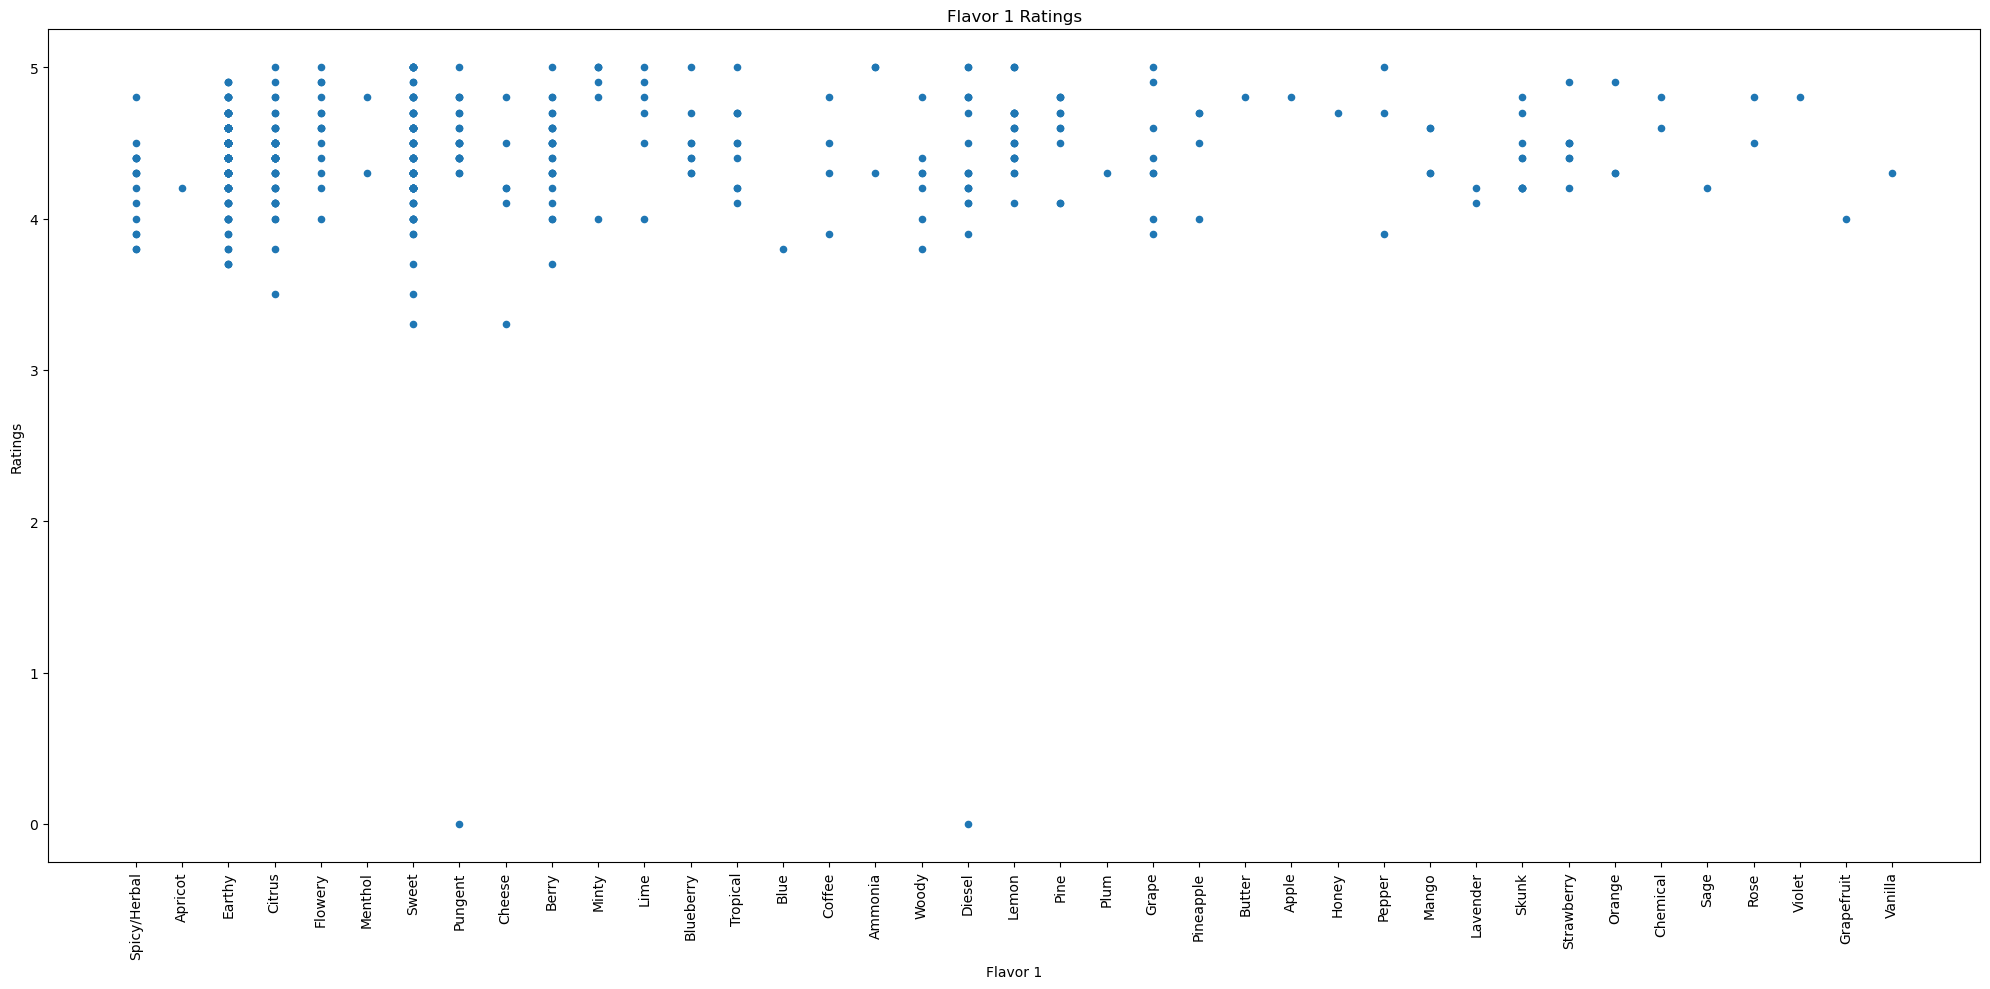

In [53]:
# Create a Scatter Plot for flavor vs rating
Data_EffectsFlavors_1.plot(kind = 'scatter', x = 'Flavor_1', y = 'Rating', figsize=(20, 10), rot=90)
plt.title("Flavor 1 Ratings")
plt.xlabel("Flavor 1")
plt.ylabel("Ratings")
plt.tight_layout()
plt.show()

In [55]:
# Perform a linear regression on flavor vs. rating
x_values = data["Weight (g)"]
y_values = data["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20, 35),fontsize=12,color="blue")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

corr = data.corr(method='Capomulin')["Weight (g)"]["Tumor Volume (mm3)"]
print(f"The correlation is {corr}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

UFuncTypeError: ufunc 'maximum' did not contain a loop with signature matching types (dtype('<U8'), dtype('<U8')) -> None

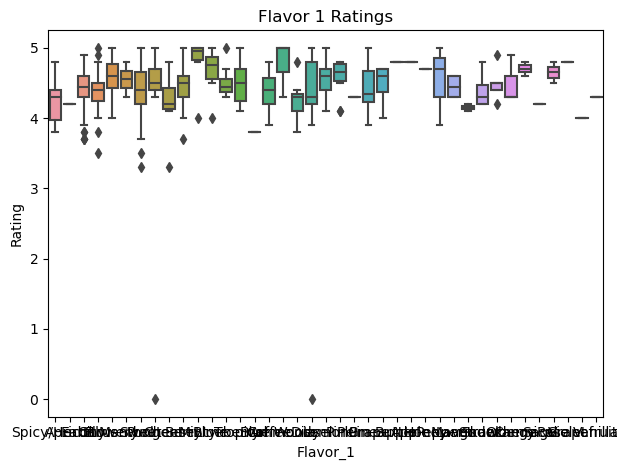

In [113]:
sns.boxplot(data=Data_EffectsFlavors_1, x="Flavor_1", y="Rating")
plt.title("Flavor 1 Ratings")
plt.tight_layout()
plt.show()

In [87]:
#Count the number of Flavor_2 per Rating
Data_EffectsFlavors_1.groupby(["Rating", "Flavor_2"]).size()

Rating  Flavor_2    
0.0     Spicy/Herbal    1
        Woody           1
3.3     Grape           1
        Pepper          1
3.5     Berry           1
                       ..
5.0     Pepper          1
        Strawberry      1
        Sweet           5
        Tree            1
        Tropical        2
Length: 200, dtype: int64

In [ ]:
per_flavor_rating = Data_EffectsFlavors_1.groupby("Flavor_2")
per_flavor_rating = per_flavor_rating["Rating"].mean()
per_flavor_rating

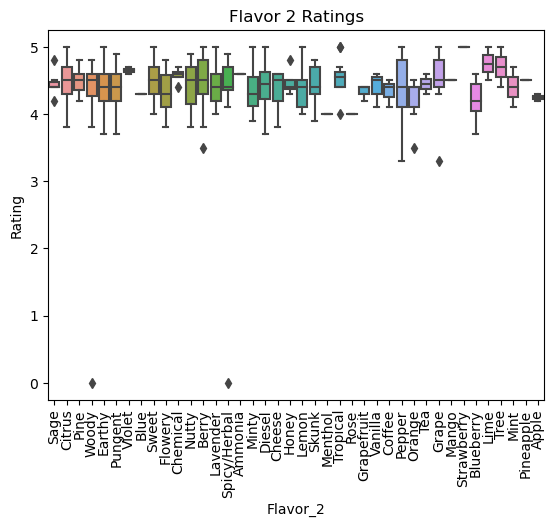

In [120]:
flavor_2BP = sns.boxplot(data=Data_EffectsFlavors_1, x="Flavor_2", y="Rating")
flavor_2BP.set_xticklabels(flavor_2BP.get_xticklabels(),rotation=90)
plt.title("Flavor 2 Ratings")
plt.show()

In [90]:
#Count the number of Flavor_3 per Rating
Data_EffectsFlavors_1.groupby(["Rating", "Flavor_3"]).size()

Rating  Flavor_3    
0.0     Pine            1
        Sweet           1
3.3     Flowery         1
        Tea             1
3.5     Earthy          2
                       ..
5.0     Rose            1
        Skunk           1
        Spicy/Herbal    1
        Sweet           3
        Tropical        1
Length: 227, dtype: int64

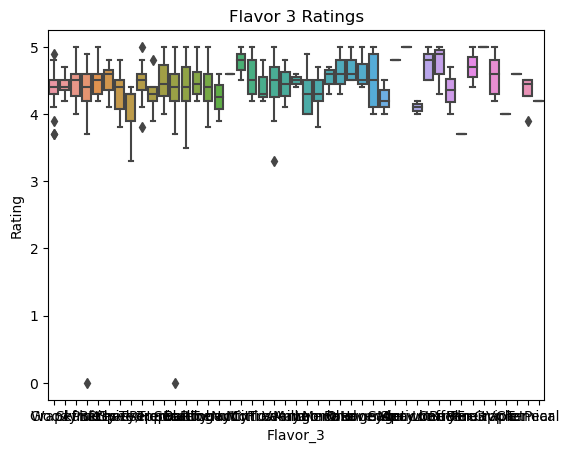

In [91]:
sns.boxplot(data=Data_EffectsFlavors_1, x="Flavor_3", y="Rating")
plt.title("Flavor 3")
plt.show()

In [114]:
Data_EffectsFlavors_1.head(10)

,Strain,Type,Rating,Effects,Flavor,Breeders,LOCATION,Effect_1,Effect_2,Effect_3,Effect_4,Effect_5,Flavor_1,Flavor_2,Flavor_3
0,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",Medical Seeds Co,Spain,Uplifted,Happy,Relaxed,Energetic,Creative,Spicy/Herbal,Sage,Woody
2,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",Canadian LP Delta 9 BioTech,Canada,Tingly,Creative,Hungry,Relaxed,Uplifted,Apricot,Citrus,Grapefruit
10,501St-Og,hybrid,4.5,"Relaxed,Euphoric,Sleepy,Happy,Talkative","Earthy,Pine,Skunk",Rare Dankness Seeds,Colorado,Relaxed,Euphoric,Sleepy,Happy,Talkative,Earthy,Pine,Skunk
11,5Th-Element,indica,4.4,"Relaxed,Focused,Euphoric,Uplifted,Aroused","Earthy,Woody,Pine",Elemental Seeds,California,Relaxed,Focused,Euphoric,Uplifted,Aroused,Earthy,Woody,Pine
13,8-Ball-Kush,indica,4.3,"Relaxed,Uplifted,Happy,Creative,Euphoric","Citrus,Earthy,Pine",Barney's Farm,"Amsterdam, Westmont, Illinois",Relaxed,Uplifted,Happy,Creative,Euphoric,Citrus,Earthy,Pine
17,91-Krypt,indica,4.7,"Relaxed,Euphoric,Happy,Hungry,Uplifted","Earthy,Pungent,Berry",DNA Genetics,"Amsterdam,Canada, California",Relaxed,Euphoric,Happy,Hungry,Uplifted,Earthy,Pungent,Berry
18,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",Pua Mana 1st Hawaiian Pakal_l_ Seed Bank,Hawaii,Relaxed,Aroused,Creative,Happy,Energetic,Flowery,Violet,Diesel
22,Aberdeen,hybrid,4.3,"Uplifted,Euphoric,Giggly,Energetic,Sleepy","Menthol,Blue,Cheese,Chemical",Canadian LP Aphria Genetics,Canada,Uplifted,Euphoric,Giggly,Energetic,Sleepy,Menthol,Blue,Cheese
27,Ace-Of-Spades,indica,4.1,"Relaxed,Euphoric,Happy,Sleepy,Hungry","Earthy,Sweet,Woody",TGA Subcool Genetics,"Seattle, Washington",Relaxed,Euphoric,Happy,Sleepy,Hungry,Earthy,Sweet,Woody
37,Afghan-Haze,hybrid,4.3,"Sleepy,Relaxed,Giggly,Happy,Creative","Earthy,Flowery,Tea",Nevil Schoenmaker and Shantibaba of Mr Nice Se...,Afghanistan,Sleepy,Relaxed,Giggly,Happy,Creative,Earthy,Flowery,Tea


In [55]:
#What Flavor has min rating?
#Grouped data by ratings and aggregated the group by min rating
Data_EffectsFlavors_1.groupby('Rating').agg('min')

,Strain,Type,Effects,Flavor,Breeders,LOCATION,Effect_1,Effect_2,Effect_3,Effect_4,Effect_5,Flavor_1,Flavor_2,Flavor_3
Rating,,,,,,,,,,,,,,
0.0,Mc1,hybrid,"Hungry,Aroused,Tingly,Uplifted,Creative","Diesel,Spicy/Herbal,Sweet",TGA Subcool Genetics,"Seattle, Washington",Hungry,Aroused,Tingly,Creative,Creative,Diesel,Spicy/Herbal,Pine
3.3,Cheeseburger,hybrid,"Talkative,Creative,Euphoric,Happy,Hungry","Cheese,Pepper,Tea",Cannasol Farms,Canada,Talkative,Creative,Euphoric,Aroused,Creative,Cheese,Grape,Flowery
3.5,Golden-Tangie,hybrid,"Focused,Happy,Aroused,Energetic,Tingly","Citrus,Orange,Earthy",Calyx Garden,"Humboldt, California",Focused,Happy,Aroused,Creative,Energetic,Citrus,Berry,Earthy
3.7,Bakerstreet,hybrid,"Aroused,Tingly,Uplifted,Creative,Euphoric","Berry,Blueberry,Blue,Cheese","Canadian LP Tweed, Inc",Arizona,Aroused,Giggly,Creative,Creative,Euphoric,Berry,Blueberry,Blue
3.8,Alien-Abduction,hybrid,"Euphoric,Happy,Hungry,Talkative,Energetic","Blue,Cheese,Cheese,Pungent",Ace Seeds,Africa,Euphoric,Happy,Creative,Aroused,Creative,Blue,Berry,Cheese
3.9,African,hybrid,"Energetic,Happy,Creative,Uplifted,Euphoric","Coffee,Berry,Flowery",Buddha Seeds,Africa,Energetic,Energetic,Aroused,Euphoric,Creative,Coffee,Berry,Chemical
4.0,Big-Holy-Nina,hybrid,"Creative,Tingly,Euphoric,Hungry,Uplifted","Berry,Pungent,Sweet",Apothecary Genetics,"Afghanistan, Hawaii and Nepal",Creative,Aroused,Aroused,Creative,Creative,Berry,Blueberry,Ammonia
4.1,Ace-Of-Spades,hybrid,"Energetic,Focused,Relaxed,Talkative,Tingly","Berry,Woody,Earthy",Alien Genetics,"Amsterdam, Netherlands",Energetic,Energetic,Euphoric,Aroused,Aroused,Berry,Blueberry,Diesel
4.2,13-Dawgs,hybrid,"Creative,Euphoric,Tingly,Uplifted,Energetic","Apricot,Citrus,Grapefruit",Ace Seeds,"Afghanistan, Hawaii and Nepal",Creative,Creative,Creative,Creative,Creative,Apricot,Apple,Berry


In [56]:
#What Flavor has max rating?
#Grouped data by ratings and aggregated the group by max rating
Data_EffectsFlavors_1.groupby('Rating').agg('max')

,Strain,Type,Effects,Flavor,Breeders,LOCATION,Effect_1,Effect_2,Effect_3,Effect_4,Effect_5,Flavor_1,Flavor_2,Flavor_3
Rating,,,,,,,,,,,,,,
0.0,The-Wills,hybrid,"Talkative,Tingly,Uplifted,Creative,Euphoric","Pungent,Woody,Pine",Unknown,Washington,Talkative,Tingly,Uplifted,Uplifted,Euphoric,Pungent,Woody,Sweet
3.3,Lethal-Purple,hybrid,"Tingly,Uplifted,Relaxed,Aroused,Creative","Sweet,Grape,Flowery",Great White North Seeds,"Omak, Washington",Tingly,Uplifted,Relaxed,Happy,Hungry,Sweet,Pepper,Tea
3.5,Purple-Goat,sativa,"Uplifted,Happy,Talkative,Creative,Energetic","Sweet,Berry,Earthy",Oregon OMMP,Oregon,Uplifted,Happy,Talkative,Energetic,Tingly,Sweet,Orange,Earthy
3.7,Malakoff,sativa,"Relaxed,Happy,Talkative,Uplifted,Focused","Sweet,Earthy,Woody",Medical Seeds Co,Spain,Relaxed,Tingly,Uplifted,Uplifted,Uplifted,Sweet,Pungent,Woody
3.8,Wild-Thailand,sativa,"Relaxed,Sleepy,Hungry,Aroused,Uplifted","Woody,Flowery,Earthy",World of Seeds Bank,"Valencia, Spain",Relaxed,Talkative,Sleepy,Uplifted,Uplifted,Woody,Woody,Sweet
3.9,Sweet-Nina,sativa,"Talkative,Happy,Uplifted,Focused,Energetic","Sweet,Minty,Earthy",Unknown,Washington,Talkative,Uplifted,Uplifted,Uplifted,Uplifted,Sweet,Skunk,Woody
4.0,Waldo,sativa,"Talkative,Uplifted,Euphoric,Happy,Relaxed","Woody,Sweet,Earthy",THSeeds,"Tacoma, Washington",Talkative,Uplifted,Uplifted,Uplifted,Uplifted,Woody,Tropical,Violet
4.1,Super-Bud,sativa,"Uplifted,Happy,Relaxed,Tingly,Energetic","Tropical,Pungent,Sweet",White Label Seed Company,"Valencia, Spain",Uplifted,Uplifted,Uplifted,Uplifted,Uplifted,Tropical,Woody,Woody
4.2,Yummy,sativa,"Uplifted,Relaxed,Happy,Sleepy,Creative","Woody,Earthy,Tropical",World of Seeds Bank,Washington State,Uplifted,Uplifted,Uplifted,Uplifted,Uplifted,Woody,Woody,Woody


<Axes: ylabel='Frequency'>

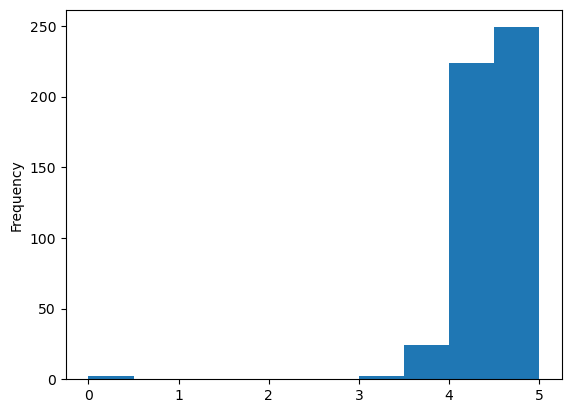

In [64]:
Data_EffectsFlavors_1["Rating"].plot(kind='hist')

In [65]:
#What Flavor has the median rating?

In [83]:
Data_FlavorRating = pd.DataFrame(Data_EffectsFlavors_1)
#Data_FlavorRating.reset_index(level=1, inplace=True)
Data_FlavorRating.reset_index(level=0, inplace=True)
Data_FlavorRating_Qty = Data_FlavorRating.rename(columns={0: "Qty"})
Data_FlavorRating_Qty

,index,Strain,Type,Rating,Effects,Flavor,Breeders,LOCATION,Effect_1,Effect_2,Effect_3,Effect_4,Effect_5,Flavor_1,Flavor_2,Flavor_3
0,0,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",Medical Seeds Co,Spain,Uplifted,Happy,Relaxed,Energetic,Creative,Spicy/Herbal,Sage,Woody
1,2,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",Canadian LP Delta 9 BioTech,Canada,Tingly,Creative,Hungry,Relaxed,Uplifted,Apricot,Citrus,Grapefruit
2,10,501St-Og,hybrid,4.5,"Relaxed,Euphoric,Sleepy,Happy,Talkative","Earthy,Pine,Skunk",Rare Dankness Seeds,Colorado,Relaxed,Euphoric,Sleepy,Happy,Talkative,Earthy,Pine,Skunk
3,11,5Th-Element,indica,4.4,"Relaxed,Focused,Euphoric,Uplifted,Aroused","Earthy,Woody,Pine",Elemental Seeds,California,Relaxed,Focused,Euphoric,Uplifted,Aroused,Earthy,Woody,Pine
4,13,8-Ball-Kush,indica,4.3,"Relaxed,Uplifted,Happy,Creative,Euphoric","Citrus,Earthy,Pine",Barney's Farm,"Amsterdam, Westmont, Illinois",Relaxed,Uplifted,Happy,Creative,Euphoric,Citrus,Earthy,Pine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,2307,White-Widow,hybrid,4.3,"Happy,Relaxed,Euphoric,Uplifted,Energetic","Earthy,Woody,Pungent",Green House Seeds,"Amsterdam, Netherlands",Happy,Relaxed,Euphoric,Uplifted,Energetic,Earthy,Woody,Pungent
497,2311,Wild-Thailand,sativa,3.8,"Euphoric,Happy,Hungry,Talkative,Energetic","Citrus,Berry,Spicy/Herbal",World of Seeds Bank,Brazil,Euphoric,Happy,Hungry,Talkative,Energetic,Citrus,Berry,Spicy/Herbal
498,2315,Wmd,indica,4.9,"Relaxed,Happy,Euphoric,Tingly,Hungry","Earthy,Berry,Pungent",Vancouver Island Seed Company,Canadian,Relaxed,Happy,Euphoric,Tingly,Hungry,Earthy,Berry,Pungent
499,2324,Wreckage,hybrid,4.5,"Uplifted,Relaxed,Focused,Energetic,Talkative","Earthy,Nutty,Sage",THSeeds,"Amsterdam, Netherlands",Uplifted,Relaxed,Focused,Energetic,Talkative,Earthy,Nutty,Sage


In [84]:
# Data_FlavorRating_min = Data_FlavorRating_Qty.groupby("Rating")['Qty'].min()
# Data_FlavorRating_min
# df_merge = df6.merge(df6_min, how="left", on=['Rating'])
# df_merge
# df_merge2 = df_merge['Qty_x'].equals(df_merge['Qty_y'])
# df_merge2
# df6_max = df6.groupby("Rating").agg({"Flavor_3": 'max', "Qty": 'max'})
# df6_max

In [ ]:
#Export to csv file
df3.to_csv("MaryJane_clean_data.csv", index=False)